# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu**

## Sayı: 26  (11 Aralık 2020)

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart'tan beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Koronavirüs Tablosu"ndan alınmaktadır.**

**Referans:** [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

**Hazırlayan:** Doğan Yiğit Yenigün (toUpperCase78)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_Turkiye_2020_12_11.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Günlük Vaka'] = covid19TR['Günlük Vaka'].fillna(0).astype(int)
covid19TR['Toplam Test'] = covid19TR['Toplam Test'].fillna(0).astype(int)
covid19TR['Ağır Hasta'] = covid19TR['Ağır Hasta'].fillna(0).astype(int)
covid19TR['Hasta Artış'] = covid19TR['Toplam Hasta'].diff().fillna(0).astype(int)
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff().fillna(0).astype(int)
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff().fillna(0).astype(int)
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff().fillna(0).astype(int)
covid19TR['Hasta +/-'] = covid19TR['Hasta Artış'].diff().fillna(0.).astype(int)
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff().fillna(0).astype(int)
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff().fillna(0).astype(int)

### **Son 20 Güne Dair Sayısal Bilgiler**

In [3]:
covid19TR[['Toplam Hasta', 'Toplam Vefat', 'Toplam İyileşen', 'Toplam Test',
          'Hastalarda Zatürre Oranı(%)', 'Ağır Hasta', 'Günlük Vaka']].tail(20)

,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Toplam Test,Hastalarda Zatürre Oranı(%),Ağır Hasta,Günlük Vaka
Tarih,,,,,,,
2020-11-22,446822,12358,374637,17245617,3.8,4217,0
2020-11-23,453535,12511,377891,17406742,3.4,4409,0
2020-11-24,460916,12672,381569,17568973,3.4,4543,0
2020-11-25,467730,12840,385480,17733520,3.4,4641,28351
2020-11-26,474606,13014,388771,17901868,3.4,4711,29132
2020-11-27,481198,13191,392616,18072981,3.4,4816,29845
2020-11-28,487912,13373,396227,18247424,3.4,4903,30103
2020-11-29,494351,13558,400242,18415636,3.4,5011,29281
2020-11-30,500865,13746,404727,18592292,3.4,5190,31219


**NOT 1:** 29 Temmuz'dan itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır.

**NOT 2:** 25 Kasım'dan itibaren _Günlük Vaka_ sayısı paylaşılmaya başlanmıştır.

### **Covid-19 - Türkiye'nin Durumu**

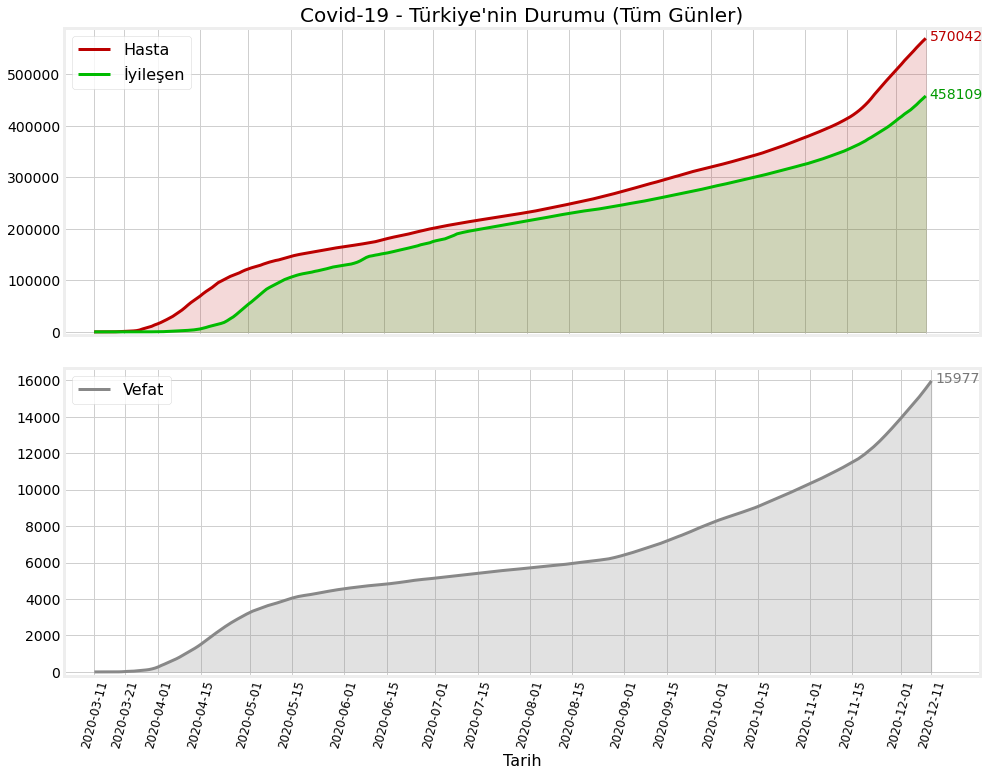

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,11), facecolor='white')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
gunler = [0, 10, 21, 35, 51, 65, 82, 96, 112, 126, 143, 157, 174, 188, 204, 218, 235, 249, 265, len(covid19TR)-1]
plt.subplot(2, 1, 1)
plt.axis([-10,len(covid19TR)+17,-7000,max(covid19TR['Toplam Hasta'])+20000])
plt.plot(covid19TR['Toplam Hasta'], linewidth=3, color='#bb0000', label='Hasta')
plt.plot(covid19TR['Toplam İyileşen'], linewidth=3, color='#00bb00', label='İyileşen')
plt.fill_between(range(len(covid19TR)), covid19TR['Toplam Hasta'], color='#bb0000', alpha=0.15)
plt.fill_between(range(len(covid19TR)), covid19TR['Toplam İyileşen'], color='#00bb00', alpha=0.15)
plt.text(len(covid19TR)+0.25,covid19TR['Toplam Hasta'][-1]-5000, covid19TR['Toplam Hasta'][-1], color='#bb0000')
plt.text(len(covid19TR)+0.25, covid19TR['Toplam İyileşen'][-1]-5000, covid19TR['Toplam İyileşen'][-1], color='#009900')
plt.title('Covid-19 - Türkiye\'nin Durumu (Tüm Günler)', fontsize=20)
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.yticks(fontsize=14)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.subplot(2, 1, 2)
plt.axis([-10,len(covid19TR)+15,-200,max(covid19TR['Toplam Vefat'])+700])
plt.plot(covid19TR['Toplam Vefat'], linewidth=3, color='#888888', label='Vefat')
plt.fill_between(range(len(covid19TR)), covid19TR['Toplam Vefat'], color='#888888', alpha=0.25)
plt.text(len(covid19TR)+0.25, covid19TR['Toplam Vefat'][-1]-100, covid19TR['Toplam Vefat'][-1], color='#777777')
plt.xlabel('Tarih', fontsize=16)
plt.xticks(gunler, fontsize=12, rotation=75)
plt.yticks(fontsize=14)
plt.grid(color='#cfcfcf')
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.show()

Türkiye'nin Koronavirüs ile mücadelesinde yukarıdaki grafiklere bakıldığında; 

Hasta artışlarının en çok yaşandığı zaman aralığı **Nisan ayının başları ile sonları arasında** olduğu, iyileşme hızının en yüksek olduğu yer ise **Nisan ayının sonları ile Mayıs ayının ikinci yarısına** kadardır. İki çizgi arasında kalan alan ise **Ağustos ayının ikinci yarısından itibaren** artışa geçmiştir ve **Kasım ayının ikinci yarısından sonra** da bu artış daha yukarılara çıkmaktadır!

Vefat sayısındaki eğim için başlarda **Nisan ayı içinde** yüksek seyretmiş, **Mayıs ayından sonra** yavaşlamış, ama **Eylül ayından itibaren** yine giderek yükselmektedir ve bu eğim **Kasım ayının ikinci yarısından sonra** daha da artmıştır!

### **Son 20 Güne Dair Hasta Sayısı Grafiği**

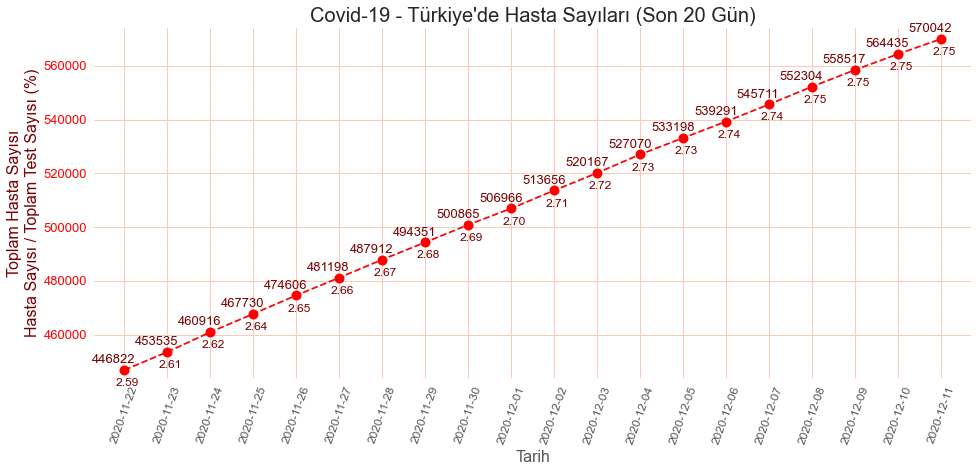

In [5]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
plt.figure(figsize=(14,6), facecolor='white')
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Hasta'][-20:], marker='o', markersize=10, linestyle='--', color='r')
plt.axis([-0.7,19.7,min(covid19TR['Toplam Hasta'][-20:])-3000,max(covid19TR['Toplam Hasta'][-20:])+4000])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.25), covid19TR.iloc[i,0]+2500, covid19TR.iloc[i,0], fontsize=13, color='#770000')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,0]-6000, "{:.2f}".format(covid19TR.iloc[i,0]/covid19TR.iloc[i,3]*100),
             fontsize=12, color='#770000')
plt.title('Covid-19 - Türkiye\'de Hasta Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Hasta Sayısı\nHasta Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Toplam hasta sayısı grafikte görüldüğü üzere **570 bini** geçmiştir! Bu sayının toplam test sayısına oranı da gün geçtikçe maalesef yükselmektedir ki son dört günde bu oran **%2.75** olarak gerçekleşmiştir!

### 25 Kasım ve Sonrasına Dair Günlük Vaka Sayısı Grafiği

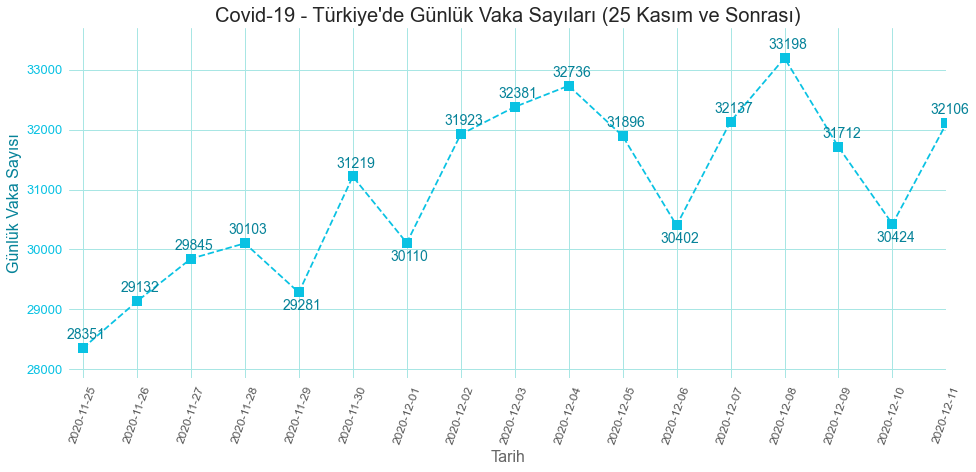

In [6]:
plt.figure(figsize=(14,6))
plt.axis([-0.25,13.25,min(covid19TR['Günlük Vaka'][259:])-500,max(covid19TR['Günlük Vaka'][259:]+500)])
plt.plot(covid19TR.index[259:], covid19TR['Günlük Vaka'][259:], marker='s', markersize=10, linestyle='--', color='#09c2e3')
for i in range(259,len(covid19TR)):
    if i in [263,265,270,274]:
        plt.text(i-len(covid19TR)+16.7, covid19TR.iloc[i,8]-300, covid19TR.iloc[i,8], color='#068399')
    else:
        plt.text(i-len(covid19TR)+16.7, covid19TR.iloc[i,8]+150, covid19TR.iloc[i,8], color='#068399')
plt.title('Covid-19 - Türkiye\'de Günlük Vaka Sayıları (25 Kasım ve Sonrası)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.xticks(covid19TR.index[259:], rotation=70, fontsize=12, color='#555555')
plt.ylabel('Günlük Vaka Sayısı', fontsize=16, color='#068399')
plt.yticks(fontsize=13, color='#09c2e3')
plt.grid(color='#a8e6e4')
plt.show()

**25 Kasım** tarihinden itibaren paylaşılmaya başlanan Günlük Vaka sayılarına dair yukarıdaki grafiğe göre ilk olarak **28351** ile başlamış olup, ilerleyen günlerde inişli çıkışlı şeklinde devam etmiştir! Sayının en yüksek olduğu gün **33198** ile 8 Aralık'tır.

_Günlük ve Toplam Vaka Sayısı ile ilgili analizler bir sonraki sayıda yer alacaktır._

### **Son 20 Güne Dair Vefat Sayısı Grafiği**

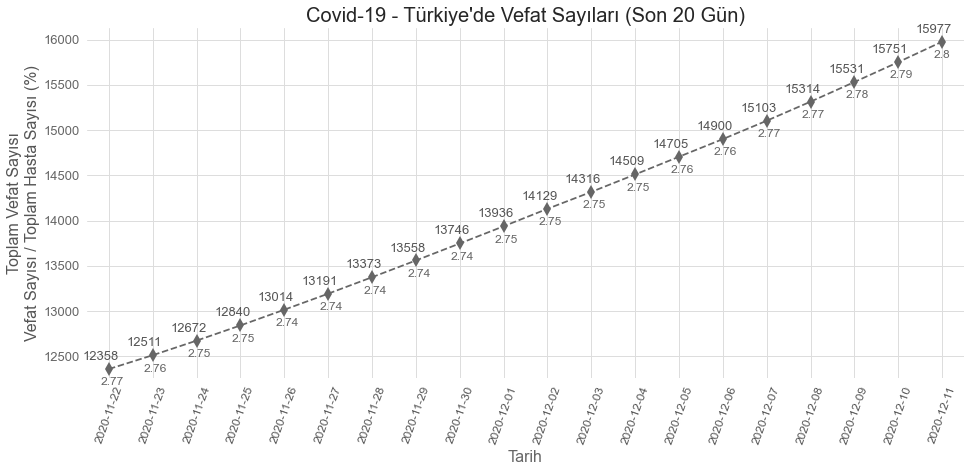

In [7]:
plt.figure(figsize=(14,6))
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vefat'][-20:], marker='d', markersize=10, linestyle='--', color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
plt.axis([-0.5,19.5,min(covid19TR['Toplam Vefat'][-20:])-100,max(covid19TR['Toplam Vefat'][-20:])+150])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.4), covid19TR.iloc[i,1]+100, covid19TR.iloc[i,1], fontsize=13, color='#555555')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,1]-180, round(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=12, color='#666666')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Hasta Sayısı (%)', fontsize=16, color='#555555')
plt.grid(color='#dddddd')
plt.show()

Toplam vefat sayısı **15 bin 900**'ü aşmıştır! Bunun yanında toplam hasta sayısına oran önceki günlerde **%2.74**'e kadar inmesinden sonra tekrar yükselmeye başlamıştır ki 11 Aralık'ta **%2.8**'e ulaşmıştır!

### **Son 20 Güne Dair İyileşen Hasta Sayısı Grafiği**

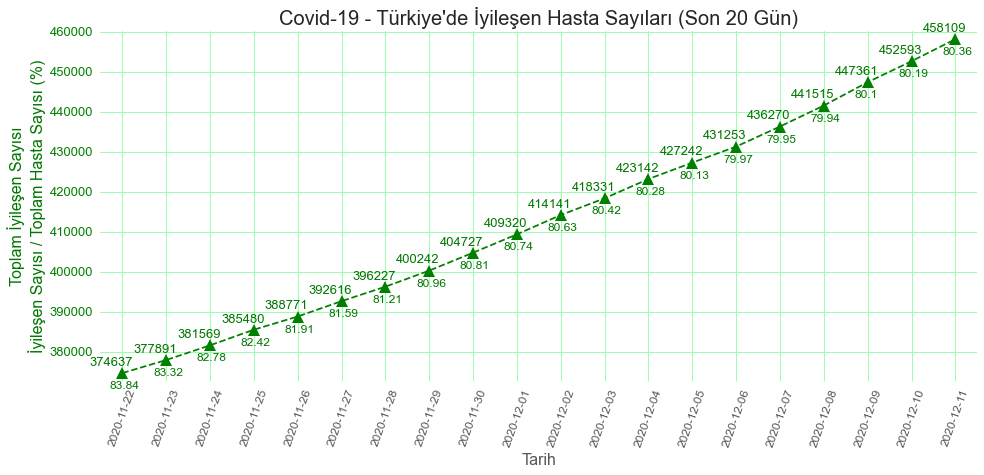

In [8]:
plt.figure(figsize=(14,6))
plt.plot(covid19TR.index[-20:], covid19TR['Toplam İyileşen'][-20:], marker='^', markersize=12, linestyle='--', color='g')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
plt.axis([-0.5,19.5,min(covid19TR['Toplam İyileşen'][-20:])-2000,max(covid19TR['Toplam İyileşen'][-20:])+2000])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.25), covid19TR.iloc[i,2]+1800, covid19TR.iloc[i,2], fontsize=13, color='#007700')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,2]-4000, round(covid19TR.iloc[i,2]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=12, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Hasta Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#9cffac')
plt.show()

İyileşen hasta sayısı son olarak **458 bini** geçmiştir. Bu sayının toplam vaka sayısına oranı da grafikte görüldüğü üzere 8 Aralık'a kadar **gerilemesinden sonra yükselmeye** başlamıştır ki son olarak 11 Aralık'ta bu oran **%80.36** olmuştur.

### **Son 90 Günün Hasta, Vefat, İyileşen & Test Artışlarına Dair İstatistikler ve Dağılımlar**

In [9]:
round(covid19TR[['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış']][-90:].describe(), 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış
count,90.00,90.00,90.00,90.00
mean,3115.63,99.76,2226.42,136510.99
std,1958.19,50.80,1278.03,29479.94
min,1391.00,55.00,1027.00,93219.00
25%,1666.50,66.25,1318.50,113344.50
50%,2203.50,75.00,1547.00,126641.50
75%,4460.25,121.25,2866.50,156360.50
max,7381.00,226.00,5846.00,208873.00


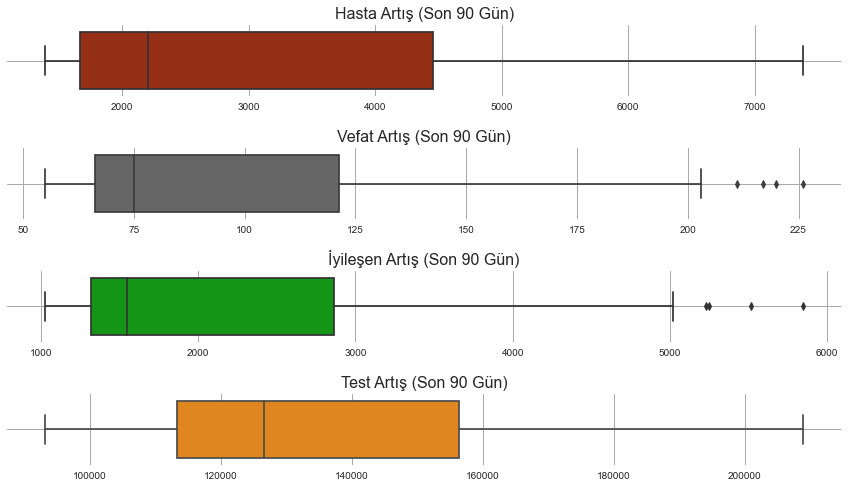

In [10]:
plt.figure(figsize=(12,7))
plt.subplot(4,1,1)
sns.boxplot(x=['Hasta Artış'], data=covid19TR[-90:], color='#aa2200')
plt.title('Hasta Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(4,1,2)
sns.boxplot(x=['Vefat Artış'], data=covid19TR[-90:], color='#666666')
plt.title('Vefat Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(4,1,3)
sns.boxplot(x=['İyileşen Artış'], data=covid19TR[-90:], color='#00aa00')
plt.title('İyileşen Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.subplot(4,1,4)
sns.boxplot(x=['Test Artış'], data=covid19TR[-90:], color='#ff8800')
plt.title('Test Artış (Son 90 Gün)', fontsize=16)
plt.grid(color='#aaaaaa')
plt.tight_layout()
plt.show()

### Tüm Günler - Hasta, Vefat & İyileşen Artış Sayıları + Sonraki 28 Güne Ait Tahminler

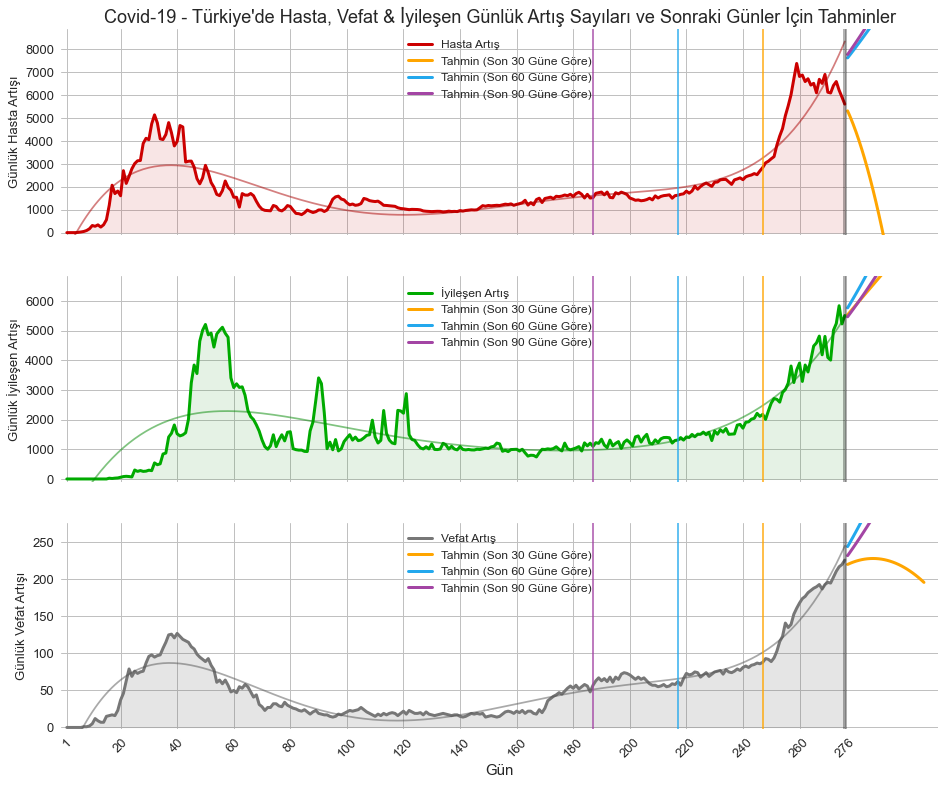

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
gun_cizgiler = np.array([0, 19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, len(covid19TR)-1])
gun_aralik = [30, 60, 90]
renk=['orange', '#23a8ed', '#a345a4']
y_pred_hepsi = []
polynomial = PolynomialFeatures(degree=2)
linear = LinearRegression()
for s in range(1,4):
    y_pred = []
    for g in gun_aralik:
        if s == 1:     y = covid19TR['Hasta Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        elif s == 2:   y = covid19TR['İyileşen Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        else:          y = covid19TR['Vefat Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+28))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_pred.append(linear.predict(x_test_poly))
    y_pred_hepsi.append(y_pred)
poly_pred = []
polynomial = PolynomialFeatures(degree=5)
for s in range(1, 4): 
    if s == 1:    y = covid19TR['Hasta Artış'].fillna(0).values.reshape(-1,1)
    elif s == 2:  y = covid19TR['İyileşen Artış'].fillna(0).values.reshape(-1,1)
    else:         y = covid19TR['Vefat Artış'].fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    poly_pred.append(linear.predict(x_poly))
plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
plt.title('Covid-19 - Türkiye\'de Hasta, Vefat & İyileşen Günlük Artış Sayıları ve Sonraki Günler İçin Tahminler', fontsize=18)
plt.plot(covid19TR['Hasta Artış'], color='#cc0000', linewidth=3, label='Hasta Artış')
plt.plot(poly_pred[0], color='#aa0000', alpha=0.5)
plt.fill_between(range(len(covid19TR)), covid19TR['Hasta Artış'], color='#bb0000', alpha=0.1)
plt.axis([-2, len(covid19TR)+32, covid19TR['Hasta Artış'].min()-100, covid19TR['Hasta Artış'].max()+1500])
for i in range(len(gun_aralik)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hepsi[0][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xticks(gun_cizgiler, ['' for _ in range(len(gun_cizgiler))])
plt.yticks(fontsize=13)
plt.ylabel('Günlük Hasta Artışı', fontsize=13)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.subplot(3,1,2)
plt.plot(covid19TR['İyileşen Artış'], color='#00aa00', linewidth=3, label='İyileşen Artış')
plt.plot(poly_pred[1], color='#008800', alpha=0.5)
plt.fill_between(range(len(covid19TR)), covid19TR['İyileşen Artış'], color='#008800', alpha=0.1)
plt.axis([-2, len(covid19TR)+32, covid19TR['İyileşen Artış'].min()-100, covid19TR['İyileşen Artış'].max()+1000])
for i in range(len(gun_aralik)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hepsi[1][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xticks(gun_cizgiler, ['' for _ in range(9)])
plt.yticks(fontsize=13)
plt.ylabel('Günlük İyileşen Artışı', fontsize=13)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.subplot(3,1,3)
plt.plot(covid19TR['Vefat Artış'], color='#777777', linewidth=3, label='Vefat Artış')
plt.plot(poly_pred[2], color='#555555', alpha=0.5)
plt.fill_between(range(len(covid19TR)), covid19TR['Vefat Artış'], color='#555555', alpha=0.15)
plt.axis([-2, len(covid19TR)+32, covid19TR['Vefat Artış'].min()-2, covid19TR['Vefat Artış'].max()+50])
for i in range(len(gun_aralik)):
    plt.plot(x_test+len(covid19TR)-90, y_pred_hepsi[2][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik[i])  + ' Güne Göre)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xlabel('Gün', fontsize=15)
plt.xticks(gun_cizgiler, gun_cizgiler+1, fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.ylabel('Günlük Vefat Artışı', fontsize=13)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper center', fontsize=12)
plt.show()

_Makine öğrenmesi yardımıyla ikinci derece polinom cinsinden_ gelecek dört hafta için tahminlere baktığımızda, _hasta_ sayısı (son 30 güne göre **azalma olabileceğinin** öngörülmesi hariç), _vefat_ sayısı (son 30 güne göre **yatay seyredebileceğinin ve azalabileceğinin** öngörülmesi hariç) ve _iyileşen_ sayısının ilerleyen günlerde hepsinin **giderek daha fazla yükseleceği** açıkça öngörülebilmektedir!

### **Son 20 Gün İçindeki Hasta Sayısı Artışları**

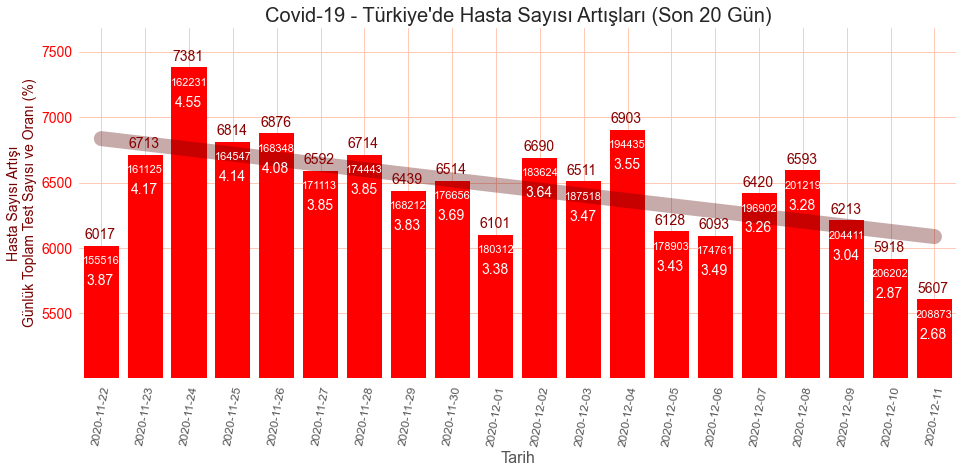

In [12]:
plt.figure(figsize=(14,6))
slp, intcp = np.polyfit(list(range(20)), covid19TR['Hasta Artış'][-20:], 1)
plt.bar(covid19TR.index[-20:], covid19TR['Hasta Artış'][-20:], color='r')
plt.axis([-0.5,19.5,covid19TR['Hasta Artış'][-20:].min()-600,covid19TR['Hasta Artış'][-20:].max()+300])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]+50, int(covid19TR.iloc[i,10]), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-19.58), covid19TR.iloc[i,10]-140, int(covid19TR.iloc[i,13]), fontsize=11, color='white')
    plt.text(i-(len(covid19TR)-19.67), covid19TR.iloc[i,10]-300, 
             "{:.2f}".format(round(covid19TR.iloc[i,10] / covid19TR.iloc[i,13] * 100, 2)), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#550000', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Artışı\nGünlük Toplam Test Sayısı ve Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Son 20 günün hasta sayıları incelendiğinde; en yüksek sayı **7381 ile 24 Kasım'da** ölçülmüş olup, bunu takip eden günlerde sürekli **6100-6900** sayıları arasında devam etmiştir; ve son iki gün **6000**'in altında kalmıştır! Günlük toplam test sayısına oranlar ise **23-26 Kasım**'da **%4**'ün üzerinde iken sonraki günlerde **%3.2-3.8** arasında kalmıştır; ve yine son iki gün **%3**'ün altında olduğu görülmüştür.

### **Son 20 Gün İçindeki Vefat Sayısı Artışları**

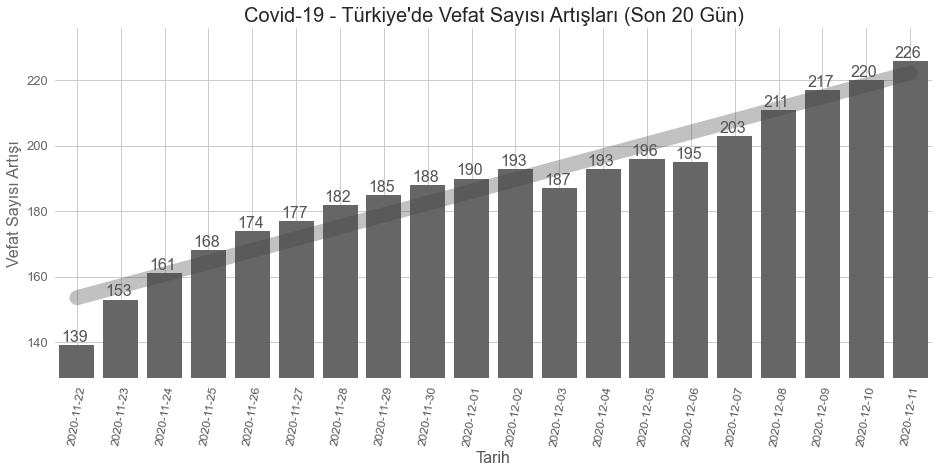

In [13]:
plt.figure(figsize=(14,6))
slp, intcp = np.polyfit(list(range(20)), covid19TR['Vefat Artış'][-20:], 1)
plt.bar(covid19TR.index[-20:], covid19TR['Vefat Artış'][-20:], color='#666666')
plt.axis([-0.5,19.5,covid19TR['Vefat Artış'][-20:].min()-10,covid19TR['Vefat Artış'][-20:].max()+10])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR['Vefat Artış'][i] >= 100:
        plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,11]+1, int(covid19TR.iloc[i,11]), fontsize=16, color='#555555')
    else:
        plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,11]+1, int(covid19TR.iloc[i,11]), fontsize=16, color='#555555')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#444444', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vefat sayılarına bakıldığında, **7 Aralık** tarihinde ilk kez **200**'ü geçmesi ve genel anlamda **artış eğiliminde** olması büyük kaygı vericidir! 

### **Son 2 Hafta İçindeki İyileşen Hasta Sayısı Artışları**

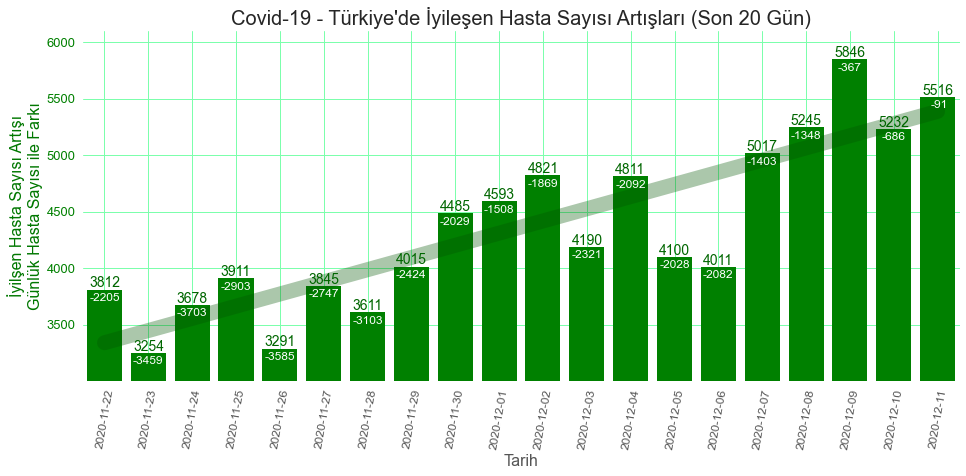

In [14]:
plt.figure(figsize=(14,6))
slp, intcp = np.polyfit(list(range(20)), covid19TR['İyileşen Artış'][-20:], 1)
plt.bar(covid19TR.index[-20:], covid19TR['İyileşen Artış'][-20:], color='g')
plt.axis([-0.5,19.5,covid19TR['İyileşen Artış'][-20:].min()-250,covid19TR['İyileşen Artış'][-20:].max()+250])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,12]+20, int(covid19TR.iloc[i,12]), fontsize=14, color='#006600')
    if abs(int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10])) >= 1000:
        plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,12]-100, int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10]),
             fontsize=12, color='white')
    elif abs(int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10])) >= 100:
        plt.text(i-(len(covid19TR)-19.73), covid19TR.iloc[i,12]-100, int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10]),
             fontsize=12, color='white')
    elif abs(int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10])) >= 10:
        plt.text(i-(len(covid19TR)-19.85), covid19TR.iloc[i,12]-100, int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10]),
             fontsize=12, color='white')
    else:
        plt.text(i-(len(covid19TR)-19.90), covid19TR.iloc[i,12]-100, int(covid19TR.iloc[i,12] - covid19TR.iloc[i,10]),
             fontsize=12, color='white')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#005500', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Artışları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı\nGünlük Hasta Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#7cffac')
plt.show()

Günlük iyileşen hasta sayısının, son 20 günde de her zaman hasta sayısının **gerisinde kalması**, dolayısıyla virüs tehlikesinin **halen giderek yükselmeye devam ettiği** kesin olarak söylenebilir! Yukarıdaki grafikte bu sayının en çok 9 Aralık'ta **5846**'ya kadar yükseldiği görülmektedir. Hasta sayısı ile farkın en yüksek olduğu gün **3703** ile 24 Kasım; en az olduğu gün ise **91** ile 11 Aralık'tır.

### **Son 20 Gün İçindeki Günlük İyileşen Sayısının Hasta Sayısına Oranı**

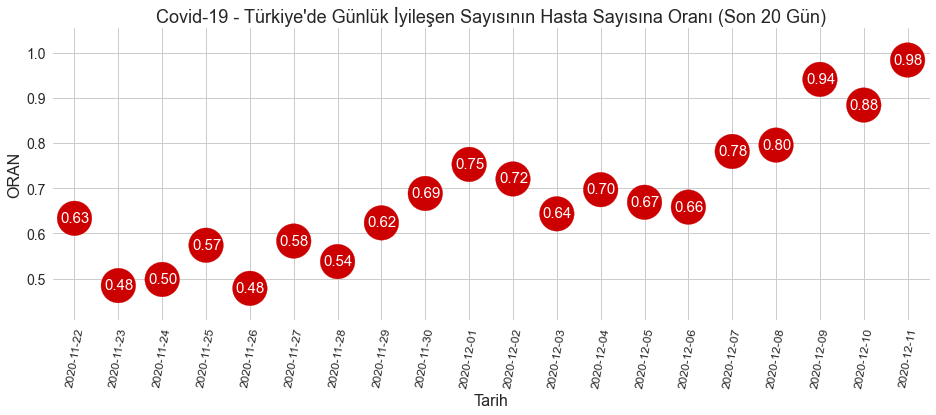

In [15]:
iyilesen_son20 = covid19TR['İyileşen Artış'][-20:]
vaka_son20 = covid19TR['Hasta Artış'][-20:]
oranlar = iyilesen_son20 / vaka_son20
colors = []
for i in range(20):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(14,5))
plt.scatter(oranlar.index, oranlar, marker="o", s=1200, color=colors)
for i in range(20):
    plt.text(i-0.32, oranlar[i]-0.008, "{:.2f}".format(round(oranlar[i], 2)), color='white', fontsize=15)
plt.axis([-0.5, 19.5, min(oranlar)-0.07, max(oranlar)+0.07])
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Hasta Sayısına Oranı (Son 20 Gün)", fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc')
plt.show()

Son 20 gündeki oranlar incelendiğinde ne yazık ki günlük iyileşen hasta sayısının **her zaman** günlük hasta sayısının **altında** kalması ve dolayısıyla bu oranların **1'in altında seyretmesi** Covid-19 riskinin yükselmeye devam ettiğinin apaçık göstergesidir! Bu grafikte en düşük oranın olduğu günler **0.48** ile **23 ve 26 Kasım** günleridir! Diğer yandan oranın en yüksek olduğu günler ise **0.94** ve **0.98**  ile **9 ve 11 Aralık**'tır.

İlk cümledeki ifadeye karşın, son üç günde oranların **1'e yakın** olması, ilerleyen günlerde iyileşen sayısının hasta sayısından **yüksek olabilme** olasılığını güçlendirmektedir.

### **Tüm Günler Hasta/Vefat/İyileşen/Günlük Vaka Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

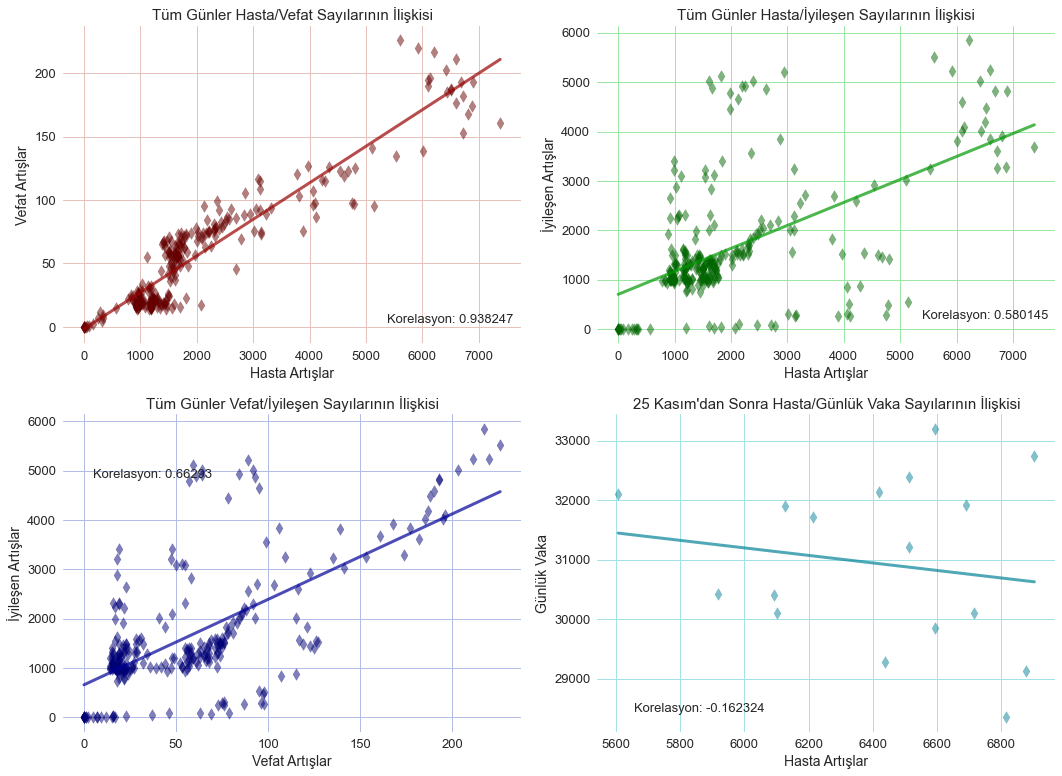

In [16]:
slp1, intcp1 = np.polyfit(covid19TR['Hasta Artış'][1:], covid19TR['Vefat Artış'][1:],1)
x1 = [0, covid19TR['Hasta Artış'].max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(15,11))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(covid19TR['Hasta Artış'], covid19TR['Vefat Artış'], marker='d', s=70, color='#660000', alpha=0.5)
plt.text(covid19TR['Hasta Artış'].max()-2000, 3,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][1:], covid19TR['Vefat Artış'][1:])[0,1], 6)),
         fontsize=13)
plt.title('Tüm Günler Hasta/Vefat Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#e6c2ba')
slp2, intcp2 = np.polyfit(covid19TR['Hasta Artış'][1:], covid19TR['İyileşen Artış'][1:], 1)
x2 = [0, covid19TR['Hasta Artış'].max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(covid19TR['Hasta Artış'], covid19TR['İyileşen Artış'], marker='d', s=70, color='#006600', alpha=0.5)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(covid19TR['Hasta Artış'].max()-2000, covid19TR['İyileşen Artış'].min()+200,
        "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][1:], covid19TR['İyileşen Artış'][1:])[0,1], 6)),
        fontsize=13)
plt.title('Tüm Günler Hasta/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#9ce6a6')
slp3, intcp3 = np.polyfit(covid19TR['Vefat Artış'][1:], covid19TR['İyileşen Artış'][1:], 1)
x3 = [0, covid19TR['Vefat Artış'].max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(covid19TR['Vefat Artış'], covid19TR['İyileşen Artış'], marker='d', s=70, color='#000077', alpha=0.5)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(covid19TR['Vefat Artış'].min()+5, covid19TR['İyileşen Artış'].max()-1000,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Vefat Artış'][1:], covid19TR['İyileşen Artış'][1:])[0,1], 6)),
         fontsize=13)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#b3bce6')
plt.subplot(2, 2, 4)
plt.scatter(covid19TR['Hasta Artış'][259:], covid19TR['Günlük Vaka'][259:], marker='d', s=70, color='#068399', alpha=0.5)
plt.title('25 Kasım\'dan Sonra Hasta/Günlük Vaka Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Günlük Vaka', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
slp4, intcp4 = np.polyfit(covid19TR['Hasta Artış'][259:], covid19TR['Günlük Vaka'][259:], 1)
x4 = [covid19TR['Hasta Artış'][259:].min(), covid19TR['Hasta Artış'][259:].max()]
y4 = [intcp4-(x4[0]-2000), intcp4-(x4[0]-2000)+(slp4*(x4[1]-x4[0]))]
plt.plot(x4, y4, alpha=0.7, linewidth=3, color='#068399')
plt.text(covid19TR['Hasta Artış'][259:].min()+50, covid19TR['Günlük Vaka'][259:].min()+100,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][259:], covid19TR['Günlük Vaka'][259:])[0,1], 6)),
         fontsize=13)
plt.grid(color='#a3e3e6')
plt.tight_layout()
plt.show()

### **Son 90 Günün Hasta, Vefat & İyileşen Sayısı Değişimine Dair İstatistikler**

In [17]:
round(covid19TR[['Hasta +/-', 'Vefat +/-', 'İyileşen +/-']][-90:].describe(),2)

,Hasta +/-,Vefat +/-,İyileşen +/-
count,90.00,90.00,90.00
mean,45.53,1.98,47.88
std,236.07,4.72,273.24
min,-775.00,-7.00,-711.00
25%,-55.75,-2.00,-88.75
50%,34.50,2.00,64.00
75%,122.75,5.00,165.25
max,696.00,18.00,1006.00


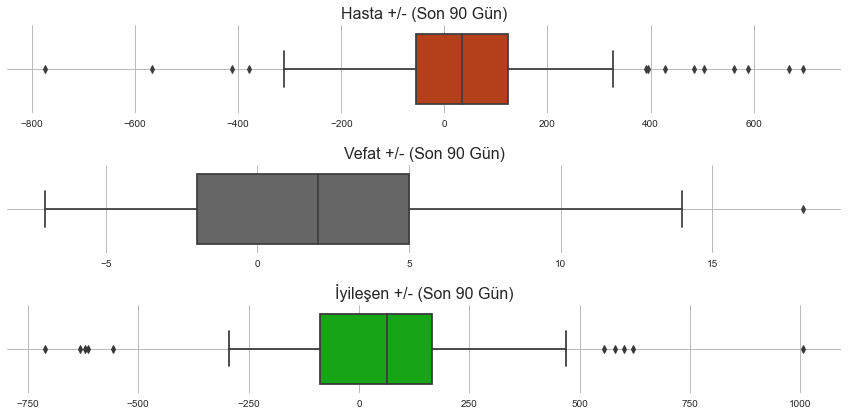

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
sns.boxplot(x=['Hasta +/-'], data=covid19TR[-90:], color='#cc3300')
plt.grid(color='#bbbbbb')
plt.title('Hasta +/- (Son 90 Gün)', fontsize=16)
plt.subplot(3,1,2)
sns.boxplot(x=['Vefat +/-'], data=covid19TR[-90:], color='#666666')
plt.grid(color='#bbbbbb')
plt.title('Vefat +/- (Son 90 Gün)', fontsize=16)
plt.subplot(3,1,3)
sns.boxplot(x=['İyileşen +/-'], data=covid19TR[-90:], color='#00bb00')
plt.grid(color='#bbbbbb')
plt.title('İyileşen +/- (Son 90 Gün)', fontsize=16)
plt.tight_layout()
plt.show()

### **Son 20 Günün Hasta Sayısı Değişim Grafiği**

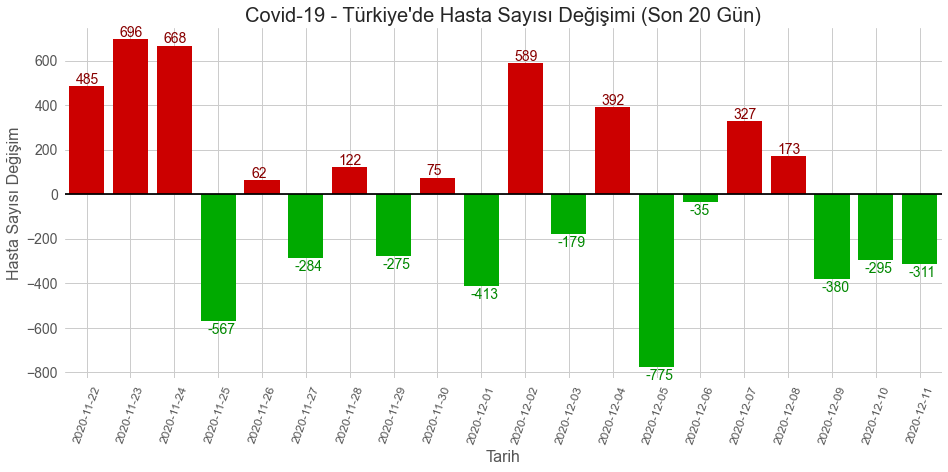

In [19]:
plt.figure(figsize=(14,6))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], covid19TR['Hasta +/-'][-20:], color=barc)
plt.axis([-0.5,19.5,min(covid19TR['Hasta +/-'][-20:])-50,max(covid19TR['Hasta +/-'][-20:])+50])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]+10, int(covid19TR.iloc[i,14]), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]-58, int(covid19TR.iloc[i,14]), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün hasta sayısı değişimine baktığımızda, en çok **696** (23 Kasım) artış ve en çok da **775** (5 Aralık) azalış yaşanmıştır.

### **Son 20 Günün Vefat Sayısı Değişim Grafiği**

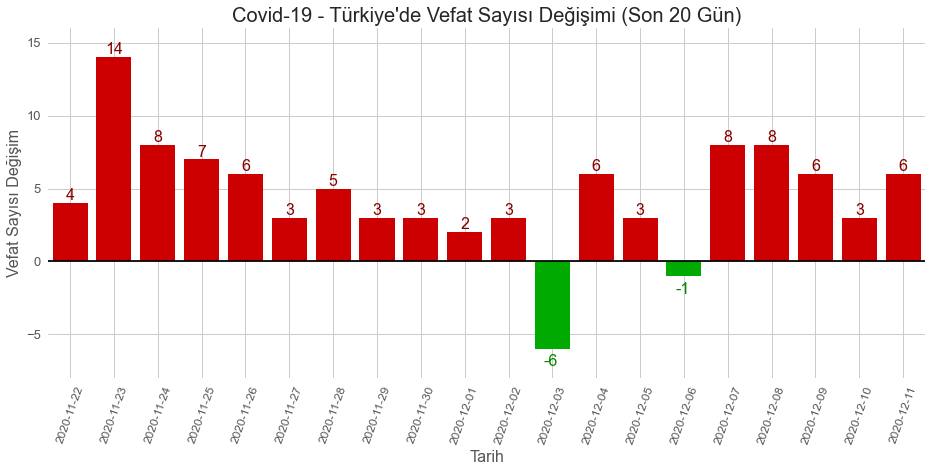

In [20]:
plt.figure(figsize=(14,6))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], covid19TR['Vefat +/-'][-20:], color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(covid19TR['Vefat +/-'][-20:])-2, max(covid19TR['Vefat +/-'][-20:])+2])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 10:
        plt.text(i-(len(covid19TR)-19.80), covid19TR.iloc[i,15]+0.2, int(covid19TR.iloc[i,15]), fontsize=16, color='#880000')
    elif covid19TR.iloc[i,15] >= 0:
        plt.text(i-(len(covid19TR)-19.90), covid19TR.iloc[i,15]+0.2, int(covid19TR.iloc[i,15]), fontsize=16, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.80), covid19TR.iloc[i,15]-1.2, int(covid19TR.iloc[i,15]), fontsize=16, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre, vefat sayısı son 20 gün için önceki güne kıyasla en fazla **14** yükselmiş ve en fazla **2** azalmıştır. Sadece **iki farklı günde** azalışın gerçekleşmesi endişe vericidir!

### **Son 20 Günün İyileşen Hasta Sayısı Değişim Grafiği**

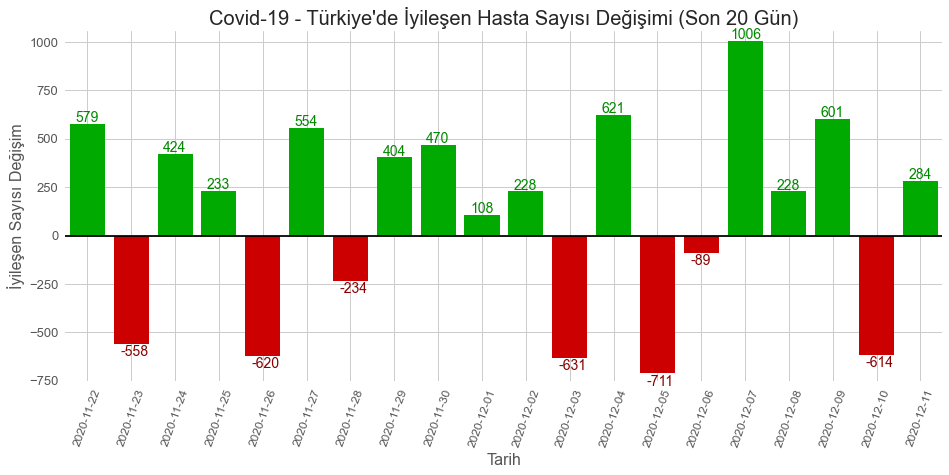

In [21]:
plt.figure(figsize=(14,6))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,16] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(covid19TR.index[-20:], covid19TR['İyileşen +/-'][-20:], color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(covid19TR['İyileşen +/-'][-20:])-40, max(covid19TR['İyileşen +/-'][-20:])+50])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,16] >= 0:
        if int(covid19TR.iloc[i,16]) >= 1000:
            plt.text(i-(len(covid19TR)-19.66), covid19TR.iloc[i,16]+10, int(covid19TR.iloc[i,16]), fontsize=14, color='#008800')
        elif int(covid19TR.iloc[i,16]) >= 100:
            plt.text(i-(len(covid19TR)-19.73), covid19TR.iloc[i,16]+10, int(covid19TR.iloc[i,16]), fontsize=14, color='#008800')
        elif int(covid19TR.iloc[i,16]) >= 10:
            plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,16]+10, int(covid19TR.iloc[i,16]), fontsize=14, color='#008800')
        else:
            plt.text(i-(len(covid19TR)-19.9), covid19TR.iloc[i,16]+7, int(covid19TR.iloc[i,16]), fontsize=14, color='#008800')
    else:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,16]-63, int(covid19TR.iloc[i,16]), fontsize=14, color='#880000')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün iyileşen hasta sayısı değişiminde, en fazla artış **7 Aralık**'ta **1006** ile gerçekleşirken; en fazla düşüş **711** ile **5 Aralık**'ta gerçekleşmiştir.

### **Son 20 Günün Toplam Aktif Hasta Sayıları**

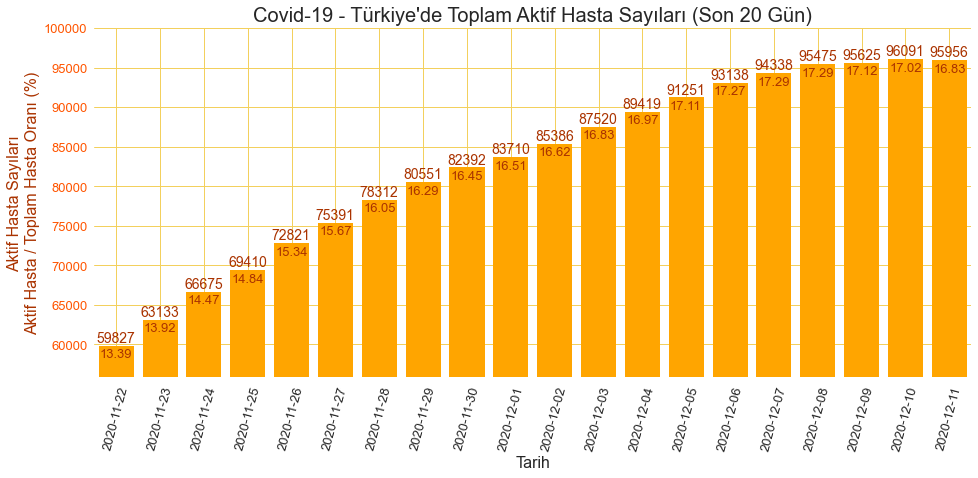

In [22]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Hasta'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
plt.figure(figsize=(14,6))
plt.bar(covid19TR.index[-20:], covid19TR['Toplam Aktif Vaka'][-20:], color='orange')
plt.axis([-0.5,19.5,covid19TR['Toplam Aktif Vaka'][-20:].min()-4000,covid19TR['Toplam Aktif Vaka'][-20:].max()+4000])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,17]+450, int(covid19TR.iloc[i,17]),
             fontsize=14, color='#aa3300')
    if covid19TR.iloc[i,16]/covid19TR.iloc[i,0]*100 < 10:
        plt.text(i-(len(covid19TR)-19.63), covid19TR.iloc[i,17]-1500, 
             "{:.2f}".format(round(covid19TR.iloc[i,17]/covid19TR.iloc[i,0]*100, 2)), fontsize=13, color='#aa3300')
    else:
        plt.text(i-(len(covid19TR)-19.63), covid19TR.iloc[i,17]-1500, 
             "{:.2f}".format(round(covid19TR.iloc[i,17]/covid19TR.iloc[i,0]*100, 2)), fontsize=13, color='#aa3300')
plt.xticks(rotation=75, fontsize=13)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Hasta Sayıları (Son 20 Gün)', fontsize=20)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Hasta Sayıları\nAktif Hasta / Toplam Hasta Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#f3d05d')
plt.show()

Son günlerde günlük _iyileşen hasta sayısının_ ne yazık ki _günlük hasta sayısından_ **sürekli düşük olması** sebebiyle bu sayının giderek yükselmeye devam etmesine rağmen, yukarıdaki grafikte görüldüğü üzere **son dört gün yatay seyirde** devam etmektedir! Aktif hasta sayısının son olarak **95 binin üzerinde** bulunduğu ve toplam hasta sayısına oranı en fazla **%17.29**'a çıktıktan sonra en son **%16.83**'e indiği gözlemlenmektedir. 

### **27 Mart-28 Temmuz Arası Toplam Yoğun Bakım ve Entübe Hasta Sayılarına Dair İstatistikler**

In [23]:
round(covid19TR[['Toplam Yoğun Bakım', 'Toplam Entübe']].describe(), 2)

,Toplam Yoğun Bakım,Toplam Entübe
count,124.00,124.00
mean,1120.46,539.24
std,388.95,264.39
min,344.00,241.00
25%,773.50,360.50
50%,1126.50,400.50
75%,1317.75,769.00
max,1922.00,1087.00


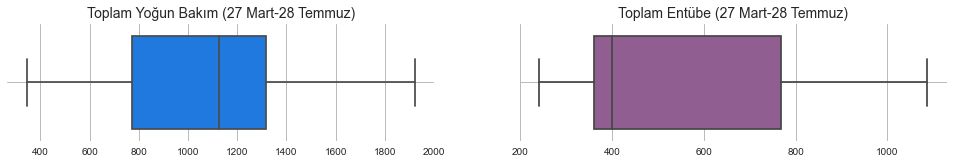

In [24]:
plt.figure(figsize=(15,2))
plt.subplot(1, 2, 1)
sns.boxplot(x=['Toplam Yoğun Bakım'], data=covid19TR, color='#0077ff')
plt.title("Toplam Yoğun Bakım (27 Mart-28 Temmuz)", fontsize=14)
plt.grid(color='#bbbbbb')
plt.subplot(1, 2, 2)
sns.boxplot(x=['Toplam Entübe'], data=covid19TR, color='#995599')
plt.title("Toplam Entübe (27 Mart-28 Temmuz)", fontsize=14)
plt.grid(color='#bbbbbb')
plt.show()

**ÖNEMLİ NOT:** 29 Temmuz'dan itibaren _Toplam Yoğun Bakım Sayısı_ ile _Toplam Entübe Hasta Sayısı_ verilerinin paylaşımı durdurulmuştur!

### **1-28 Temmuz Arası Toplam Yoğun Bakım & Entübe Hasta Sayıları**

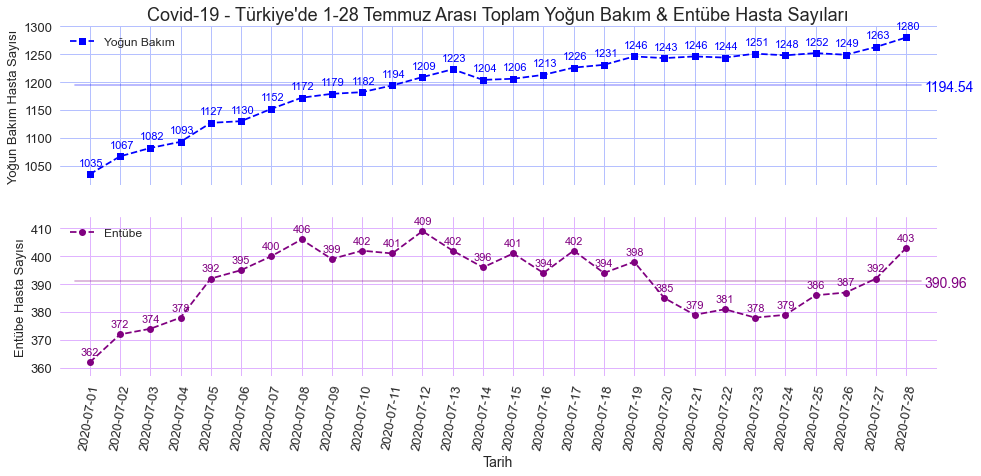

In [25]:
x = [-0.5, 27.5]
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(covid19TR.index[112:140], covid19TR['Toplam Yoğun Bakım'][112:140], 
         linestyle='--', marker='s', label='Yoğun Bakım', color='blue')
for i in range(28):
    plt.text(i-0.35, covid19TR.iloc[i+112,4]+15, int(covid19TR.iloc[i+112,4]), fontsize=11, color='blue')
plt.axis([-1, 28, covid19TR['Toplam Yoğun Bakım'][112:140].min()-20, covid19TR['Toplam Yoğun Bakım'][112:140].max()+20])
yb_ort = covid19TR['Toplam Yoğun Bakım'][112:140].mean()
y1 = [yb_ort, yb_ort]
plt.text(27.6, yb_ort-10, round(yb_ort, 2), color='b')
plt.plot(x, y1, alpha=0.3, color='blue')
plt.xticks(covid19TR.index[112:140], ['' for _ in range(28)])
plt.yticks(fontsize=13)
plt.title('Covid-19 - Türkiye\'de 1-28 Temmuz Arası Toplam Yoğun Bakım & Entübe Hasta Sayıları', fontsize=18)
plt.ylabel('Yoğun Bakım Hasta Sayısı', fontsize=13)
plt.legend(loc='upper left', fontsize=12)
plt.grid(color='#b5c0ff')
plt.subplot(2,1,2)
plt.plot(covid19TR.index[112:140], covid19TR['Toplam Entübe'][112:140], 
         linestyle='--', marker='o', label='Entübe', color='purple')
for i in range(28):
    plt.text(i-0.3, covid19TR.iloc[i+112,5]+2.5, int(covid19TR.iloc[i+112,5]), fontsize=11, color='purple')
plt.axis([-1, 28, covid19TR['Toplam Entübe'][112:140].min()-5, covid19TR['Toplam Entübe'][112:140].max()+5])
ent_ort = covid19TR['Toplam Entübe'][112:140].mean()
y2 = [ent_ort, ent_ort]
plt.text(27.6, ent_ort-2, round(ent_ort, 2), color='purple')
plt.plot(x, y2, alpha=0.3, color='purple')
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Tarih', fontsize=14)
plt.ylabel('Entübe Hasta Sayısı', fontsize=13)
plt.legend(loc='upper left', fontsize=12)
plt.grid(color='#e0b3ff')
plt.show()

**1-28 Temmuz tarihleri arasındaki veriler incelendiğinde;**

Toplam yoğun bakım hasta sayısı, **1200'ün** üzerinde ve en son **1280** olarak açıklanmıştı. İlgili grafiğin genel seyrine baktığımızda bu sayının **giderek artabileceği** öngörülebilir.

Toplam entübe hasta sayısı ise en son **403'te** kaldığı ve genel olarak **yatay yönde** seyrettiği gözlemlenebilir, ancak sonraki günler için bu sayının da yükselebileceği ihtimali göz önünde bulundurulmalıdır.

### Son 4 Hafta için Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları

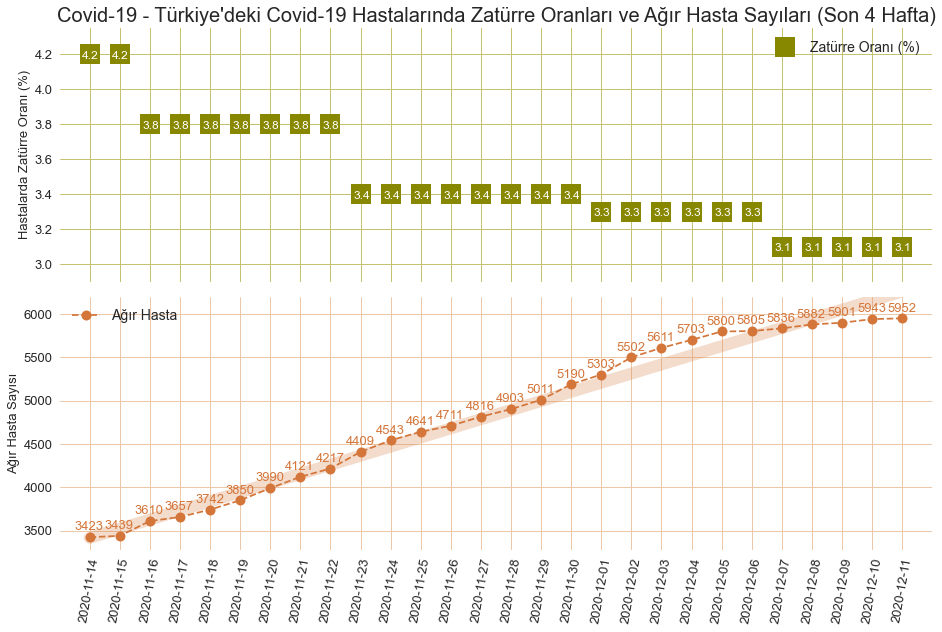

In [26]:
plt.figure(figsize=(13.5,9))
lm = len(covid19TR)-28
plt.subplot(2,1,1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,6], linestyle=' ', marker='s', markersize=20,
         label='Zatürre Oranı (%)', color='#888800')
for i in range(lm, len(covid19TR)):
    plt.text(i-lm-0.25, covid19TR.iloc[i,6]-0.025, covid19TR.iloc[i,6], fontsize=12, color='white')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,6].min()-0.2, covid19TR.iloc[lm:,6].max()+0.15])
plt.title('Covid-19 - Türkiye\'deki Covid-19 Hastalarında Zatürre Oranları ve Ağır Hasta Sayıları (Son 4 Hafta)', fontsize=20)
plt.ylabel('Hastalarda Zatürre Oranı (%)', fontsize=13)
plt.xticks(covid19TR.index[lm:], ['' for _ in range(len(covid19TR.index[lm:]))])
plt.yticks(fontsize=13)
plt.grid(color='#c4c270')
plt.legend(loc='upper right', fontsize=14)
         
plt.subplot(2,1,2)
slp, intcp = np.polyfit(list(range(28)), covid19TR['Ağır Hasta'][-28:], 1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,7], linestyle='--', marker='o', markersize=10,
         label='Ağır Hasta', color='#d4763a')
plt.plot([0, 27],[intcp, intcp+(slp*27)], color='#d4763a', alpha=0.25, linewidth=12)
for i in range(lm,len(covid19TR)):
    plt.text(i-lm-0.5, covid19TR.iloc[i,7]+80, int(covid19TR.iloc[i,7]), fontsize=13, color='#d4763a')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,7].min()-150, covid19TR.iloc[lm:,7].max()+250])
plt.ylabel('Ağır Hasta Sayısı', fontsize=13)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#edc8a8')
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

**Son 4 haftada hastalardaki zatürre oranları ve ağır hasta sayıları için;**

_Hastalarda Zatürre Oranı,_ son dört hafta içinde sırayla **%4.2**, **%3.8**, **%3.4**, **%3.3** ve son olarak **%3.1** şeklinde ölçülmüştür.

**Not:** Bu oranların genellikle haftalık bazda verildiği ve ilgili günlerde dolayısıyla aynı olarak kaldığı dikkate alınmalıdır.

_Ağir Hasta Sayısı_ son günlerde **giderek artmaya** devam ederek en son **11 Aralık**'ta **5952**'ye kadar yükselmiştir! Bu artışın **aynı** doğrultuda ilerlediği ve son bir haftada da **yavaşladığı** açıkça görülmektedir.

### Hasta, Vefat, İyileşen & Test Artışlarının İkişer Haftalık Toplamları

In [27]:
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff()
analiz_sutunlar = ['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış',
                   'Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Test +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_haftalik_toplam = covid19TR.resample('2W', on='Tarih')[analiz_sutunlar[:4]].sum()
covid19TR_haftalik_toplam

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış
Tarih,,,,
2020-03-15,17,0,0,0
2020-03-29,9199,131,105,65446
2020-04-12,47739,1067,3341,310654
2020-04-26,53174,1607,25694,513642
2020-05-10,28527,981,63551,480856
2020-05-24,18170,554,26003,461664
2020-06-07,13305,352,19275,506331
2020-06-21,17553,258,22271,606647
2020-07-05,18073,275,20440,685240


### Aynı Sütunların ve Değişimlerinin İkişer Haftalık Ortalamaları

In [28]:
covid19TR_haftalik_ortalama = covid19TR.resample('2W', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_haftalik_ortalama, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Hasta +/-,Vefat +/-,İyileşen +/-,Test +/-
Tarih,,,,,,,,
2020-03-15,3.40,0.00,0.00,0.00,2.40,0.00,0.00,0.00
2020-03-29,657.07,9.36,7.50,4674.71,128.79,1.64,2.50,713.00
2020-04-12,3409.93,76.21,238.64,22189.57,212.43,5.29,31.86,1838.43
2020-04-26,3798.14,114.79,1835.29,36688.71,-173.71,0.14,219.79,-1038.79
2020-05-10,2037.64,70.07,4539.36,34346.86,-58.21,-3.71,-24.79,1072.14
2020-05-24,1297.86,39.57,1857.36,32976.00,-28.64,-1.07,-151.36,-828.43
2020-06-07,950.36,25.14,1376.79,36166.50,-16.21,-0.64,111.07,767.57
2020-06-21,1253.79,18.43,1590.79,43331.93,19.86,0.00,-88.21,368.64
2020-07-05,1290.93,19.64,1460.00,48945.71,-3.14,-0.29,-16.00,422.71


**Sonuç olarak; yukarıdaki analizlerde tüm bu rakamlar ve görseller şunu işaret ediyor ki Türkiye'de Koronavirüs tehlikesi eğer kısıtlamalar ve kapanmalar olmadığı müddetçe kış mevsiminde GİDEREK YÜKSELMEYE devam edecek!**

**Dolayısıyla, ilerleyen aylarda virüsün yayılmasına engel olmak için asla ve asla virüs yokmuş gibi davranmamaya; kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek önlemlerimizi alarak kontrollü yaşamaya devam edelim. Zorunlu kalmadıkça dışarı çıkmayalım; eğer dışarıdaysak maske takmaya, dezenfaktan kullanmaya, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya LÜTFEN özen gösterelim! Tabi, hafta içi her akşam ve hafta sonu kısıtlamalarına mutlaka riayet edelim!**

## Virüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...